# Dog Rating Project - Wrangling and Analyzing
## Introduction
> In this project, we will wrangling, analyzing and also visualizing the data set from twitter named WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. We will be using WeRateDogs twitter archives. These archives containts basic twitter information. Using the gathered data provided, we will assess, clean, store, analyze and visualize the data.

# Table of Contents
## Introduction

- [Part I - Gathering Data](#Gathering )
- [Part II - Assessing Data](#Assessing)
- [Part III -Cleaning Data ](#Cleaning)
- [Part IV - Storing, Analyzing and Visualizing Data](#Visualizing)
- [Part V - Reporting](#Reporting)



<a id='intro'></a>

## Gathering Data¶
#### 1. The WeRateDogs Twitter Archive

In [37]:
#import major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import requests
import tweepy 
import json
import csv
import sys
import os
import time


In [38]:
# Read the twitter_archive_enhanced.csv file and 
# set it as a dataframe called df.
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,8.916900e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,8.913280e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

#### 2.The Tweet image predictions

In [5]:
#I didnt use the tweet account to download the file, instead i download from udacity and 
# read the tsv file
images_predictions = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
images_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
762,688898160958271489,https://pbs.twimg.com/media/CY91OENWUAE5agj.jpg,1,Ibizan_hound,0.853170,True,Chihuahua,0.039897,True,Italian_greyhound,0.035220,True
497,675798442703122432,https://pbs.twimg.com/media/CWDrGH4UYAARoq_.jpg,1,beagle,0.681218,True,basset,0.125121,True,boxer,0.080398,True
861,697242256848379904,https://pbs.twimg.com/media/Ca0aIR9WcAAHiPy.jpg,1,grey_fox,0.236031,False,Siamese_cat,0.165791,False,Eskimo_dog,0.063533,True


#### 3. Twitter API 

In [6]:
# We are creating a list to put all the tweet information. 
# here we are also reading the tweet_json.txt that was provided from the Udacity resource 
tweets = []
tweet_json = open('tweet_json.txt', 'r')

for line in tweet_json:
    tweet = json.loads(line)
    tweets.append(tweet)
    
tweet_json.close()

In [7]:
print(tweets[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [8]:
# Since the reading the json file gives to much information, 
# we can create an empty data frame to only on fields we will like to analyze  
# create a empty dataframe for map the tweet_data info
tweet_data = pd.DataFrame()
tweet_data['id'] = list(map(lambda tweet: tweet['id'], tweets))

tweet_data['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))

tweet_data['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))

In [9]:
#Reading the json file 
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [8]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [9]:
tweet_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


# Assessing Data 

> After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. we will detect and document at least eight (8) quality issues and two (2) tidiness issues.

### Visually and Programmatically Assessing

#### Visual Assessing 

In [40]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
943,7.527020e+17,NaN,NaN,2016-07-12 03:11:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,6.840000e+17,4.196984e+09,2016-01-03 05:11:12 +0000,"https://vine.co/v/ibvnzrauFuV,https://vine.co/...",11,10,None,None,None,None,None
1888,6.747820e+17,NaN,NaN,2015-12-10 02:44:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Bedazzled pup here. Fashionable af. Super yell...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674781762...,8,10,None,None,None,None,None
1977,6.729890e+17,NaN,NaN,2015-12-05 04:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Schnozz. He's had a blurred tail since...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672988786...,10,10,Schnozz,None,None,pupper,None
926,7.548750e+17,NaN,NaN,2016-07-18 03:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rubio. He has too much ...,6.790000e+17,4.196984e+09,2015-12-22 04:35:49 +0000,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None
581,8.004440e+17,NaN,NaN,2016-11-20 21:00:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sampson. He's about to ...,7.760000e+17,4.196984e+09,2016-09-14 17:40:06 +0000,https://twitter.com/dog_rates/status/776113305...,11,10,Sampson,None,None,pupper,None


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

In [13]:
# Number of retweet that df has
len(df[df.retweeted_status_id.isnull() == False])

181

In [41]:
images_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
images_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
485,675489971617296384,https://pbs.twimg.com/media/CV_SimUWoAAvJSY.jpg,1,West_Highland_white_terrier,0.139613,True,seat_belt,0.118647,False,Old_English_sheepdog,0.093952,True
655,682242692827447297,https://pbs.twimg.com/media/CXfQG_fW8AAjVhV.jpg,1,snorkel,0.504983,False,loggerhead,0.345298,False,scuba_diver,0.074754,False
1401,768855141948723200,https://pbs.twimg.com/media/CquFrCKWAAAr32m.jpg,1,chow,0.720219,True,Brabancon_griffon,0.058365,True,Rottweiler,0.055114,True
1341,758828659922702336,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,1,Chesapeake_Bay_retriever,0.480048,True,vizsla,0.264522,True,Weimaraner,0.121840,True
590,679148763231985668,https://pbs.twimg.com/media/CWzSMmAWsAAyB1u.jpg,1,Italian_greyhound,0.302685,True,hair_slide,0.124281,False,Afghan_hound,0.059846,True


In [12]:
#number of missing id in df that is missing in images
len(df[df.tweet_id.isin(images_predictions.tweet_id)])

0

### Quality Issues 
#### df dataframe 
- The Data contains retweets. It shows that there are 181 retweet that needs to be excluded
- It id hard to read all the dataset, so remvoe unneccessary fields from the ananlysis 
- Inconsistent naming of the dogs name 
- timestamp and retweeted_status_timestamp are type 'object'

#### images 
- p1, p2, and p3 contain underscores instead of spaces in the labels
- In the df dataframe, there are 2356 but in the images it contain 2075.

#### tweet_df 
- It containts 0 data

### Tidiness issues
- Issues with the structure of the data
- Parse the datetime information into seperate columns
- Drop columns that are not needed & rearrange column order for an easier read
- Combine each dog stage column into a single column named "stage"
- tweet_id column needs to be converted from a number to string value
- Date and Time columns need to be converted to datetime objects
- Rating columns need to be converted to float values


    

## Cleaning Data

In [66]:
# coping the dataframes for cleaning purpose  
df_clean = df.copy()
images_predictions_clean = images_predictions.copy()
tweet_data_clean = tweet_data.copy()



#### 1. Removing the Retweets in the df data frame 

#### Define 
we have noticed that the retweet_status_Id has a value of 181. We will clean the data by deleting retweets. 

#### CODE

In [67]:
df_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455128e+17,2.015385e+16,7.720221e+17,1.241437e+16,13.126486,10.455433
std,6.856706e+16,7.583419e+16,1.253546e+17,6.236131e+16,9.597227e+16,45.876648,6.745237
min,6.660210e+17,6.660000e+17,1.185634e+07,6.660000e+17,7.832140e+05,0.000000,0.000000
25%,6.783992e+17,6.760000e+17,3.086374e+08,7.190000e+17,4.196984e+09,10.000000,10.000000
50%,7.196275e+17,7.035000e+17,4.196984e+09,7.800000e+17,4.196984e+09,11.000000,10.000000
75%,7.993375e+17,8.260000e+17,4.196984e+09,8.200000e+17,4.196984e+09,12.000000,10.000000
max,8.924210e+17,8.860000e+17,8.410000e+17,8.870000e+17,7.870000e+17,1776.000000,170.000000


In [68]:
#delete the retweet by filtering the null of retweeted_status_user_id
df_clean  = df_clean[pd.isnull(df_clean['retweeted_status_user_id'])]

#### TEST

In [69]:
#try to Test the number 
print(sum(df_clean.retweeted_status_user_id.value_counts()))

0


#### 2. We will delete the columun that is not going to be used for the analysis 

#### DEFINE
> Another Quality issues we can see here is all the fields that we will not be used becasue in the above cleaning, we removed all the retweet. so we dont need the retweeted staus, retweeted_status user id, and timestamp.

#### CODE

In [70]:
df_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 
               'in_reply_to_user_id','in_reply_to_status_id'],
              axis= 1 , inplace= True)

#### TEST

In [47]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [71]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null float64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 220.9+ KB


#### 3. We will remove the column like doggo, floofer, pupper, puppo 

#### DEFINE
> In the next quality check, we will combine the doggo,floofer, pupper, puppo into one field called dog_stage. 

##### CODE

In [72]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null float64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 220.9+ KB


In [73]:
# we will use the Melt function in order to reshape the data freame in to computer friendly

STAGES = ['doggo', 'pupper','floofer', 'puppo']
COLUMNS = [i for i in df_clean.columns.tolist() if i not in STAGES]


df_clean = pd.melt(df_clean, id_vars = COLUMNS, value_vars = STAGES, 
                         var_name = 'stages', value_name = 'dog_stage')
# Delete column 'stages'
df_clean = df_clean.drop('stages', 1)


#### TEST

In [77]:
df_clean=df_clean.drop_duplicates(['tweet_id'], keep = 'last')

In [78]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 6525 to 8699
Data columns (total 9 columns):
tweet_id              2171 non-null float64
timestamp             2171 non-null object
source                2171 non-null object
text                  2171 non-null object
expanded_urls         2114 non-null object
rating_numerator      2171 non-null int64
rating_denominator    2171 non-null int64
name                  2171 non-null object
dog_stage             2171 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 169.6+ KB


In [79]:
df_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
6640,8.674210e+17,2017-05-24 16:44:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,puppo
7720,7.019530e+17,2016-02-23 02:12:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rilo. He's a Northern Curly Ticonderoga. ...,https://twitter.com/dog_rates/status/701952816...,11,10,Rilo,None
8586,6.679250e+17,2015-11-21 04:37:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He has always wanted to be a c...,https://twitter.com/dog_rates/status/667924896...,9,10,Jiminy,None
6910,8.174160e+17,2017-01-06 17:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Strudel. He's rather h*ckin pupset that y...,https://www.gofundme.com/help-strudel-walk-aga...,11,10,Strudel,None
8387,6.715430e+17,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",https://twitter.com/dog_rates/status/671542985...,10,10,JD,None
7865,6.907360e+17,2016-01-23 03:20:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Peaches. She's a Dingleberry Zand...,https://twitter.com/dog_rates/status/690735892...,13,10,Peaches,None
7380,7.453150e+17,2016-06-21 17:58:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sugar. She excels underwater. 12/10 ph...,https://twitter.com/dog_rates/status/745314880...,12,10,Sugar,None
6727,8.472510e+17,2017-03-30 00:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Furzey. He's doing an elevated sandy z...,https://twitter.com/dog_rates/status/847251039...,12,10,Furzey,None
7045,7.931660e+17,2016-10-31 19:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benji. He's Air Bud. It's a low effort...,https://twitter.com/dog_rates/status/793165685...,12,10,Benji,None
7426,7.392380e+17,2016-06-04 23:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,None


#### 4. we will change the date format

#### DEFINE
> In the Original file the timestamp is not in separate columns and in this part, we will separate it in a date and time format 

#### CODE

In [52]:
#we will change the date stamp
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

df_clean['date'] = df_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_clean['time'] = df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))


##### TEST

In [80]:
df_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
6525,8.924210e+17,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
6526,8.921770e+17,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
6527,8.918150e+17,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None


In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 6525 to 8699
Data columns (total 9 columns):
tweet_id              2171 non-null float64
timestamp             2171 non-null object
source                2171 non-null object
text                  2171 non-null object
expanded_urls         2114 non-null object
rating_numerator      2171 non-null int64
rating_denominator    2171 non-null int64
name                  2171 non-null object
dog_stage             2171 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 169.6+ KB


#### Images_predictions Dateframe 2 
#### DEFINE
> We Need to drop the duplicate URL

#### 1. We will drop duplicates 
#### CODE

In [82]:
# we will drop the duplicate url 
images_predictions_clean = images_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### TEST

In [83]:
#We will try if the code worked 
sum(images_predictions_clean['jpg_url'].duplicated())

0

In [84]:
images_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


#### Tidiness - We will change the id data type to int

In [88]:
#CODE
tweet_data_clean['id'] = tweet_data_clean['id'].astype('int')

In [100]:
#TEST
tweet_data_clean['id'].dtypes

dtype('int64')

In [107]:

df_clean['tweet_id'] = df_clean['tweet_id'].astype('float').astype('int')

In [108]:
df_clean['tweet_id'].dtypes

dtype('int64')

In [99]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 6525 to 8699
Data columns (total 9 columns):
tweet_id              2171 non-null object
timestamp             2171 non-null object
source                2171 non-null object
text                  2171 non-null object
expanded_urls         2114 non-null object
rating_numerator      2171 non-null int64
rating_denominator    2171 non-null int64
name                  2171 non-null object
dog_stage             2171 non-null object
dtypes: int64(2), object(7)
memory usage: 169.6+ KB


In [91]:
images_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [92]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### Tidiness 2 
#### we will merge the dataframes togther for easy use 

#### CODE

In [113]:
twitter_master = pd.merge(right=df_clean,
                                 left=tweet_data_clean, left_on='id', right_on='tweet_id', how='inner')

#### TEST

In [112]:
twitter_master = twitter_master.merge(images_predictions_clean, on='tweet_id', how='inner')
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 45 columns):
timestamp             0 non-null object
source                0 non-null object
text                  0 non-null object
expanded_urls         0 non-null object
rating_numerator      0 non-null float64
rating_denominator    0 non-null float64
name                  0 non-null object
dog_stage             0 non-null object
id                    0 non-null float64
retweet_count         0 non-null float64
favorite_count        0 non-null float64
jpg_url_x             0 non-null object
img_num_x             0 non-null float64
p1_x                  0 non-null object
p1_conf_x             0 non-null float64
p1_dog_x              0 non-null object
p2_x                  0 non-null object
p2_conf_x             0 non-null float64
p2_dog_x              0 non-null object
p3_x                  0 non-null object
p3_conf_x             0 non-null float64
p3_dog_x              0 non-null object
twee

### Storing, Analyzing and Visualizing 

#### Storing the datasets

In [115]:
df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8')

#### Analyze

In [116]:
df_clean.info(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 6525 to 8699
Data columns (total 9 columns):
tweet_id              2171 non-null int64
timestamp             2171 non-null object
source                2171 non-null object
text                  2171 non-null object
expanded_urls         2114 non-null object
rating_numerator      2171 non-null int64
rating_denominator    2171 non-null int64
name                  2171 non-null object
dog_stage             2171 non-null object
dtypes: int64(3), object(6)
memory usage: 169.6+ KB


#### Visualization 

#### 1. What is the Relationship of the favorite count to Retweet counts? 

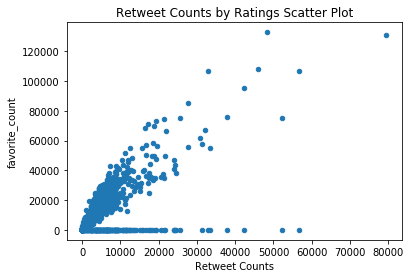

In [117]:
tweet_data.plot(x='retweet_count', y='favorite_count', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('favorite_count')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output1.png',bbox_inches='tight');


We can see that the relationship between the retweet and favorite count. we see that there is a positive relashionship between the retweet_count and favorite_cont. 

#### 2.What are the Most Rated Dog types? 

In [119]:
images_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [121]:
images_predictions['p1'].value_counts().head(20)

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
Name: p1, dtype: int64

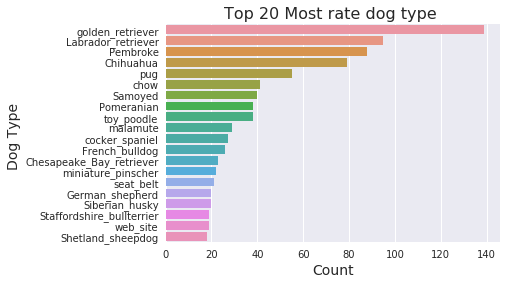

In [122]:
sorted_source = images_predictions_clean['p1'].value_counts()[:20].index
## print(image_prediction_clean['p1'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data = images_predictions_clean, y = 'p1', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Type ', fontsize=14)
plt.title('Top 20 Most rate dog type ',fontsize=16)
fig = plt.gcf()
fig.savefig('output2.png',bbox_inches='tight');

#### 3. What are te different dogs stages count? 

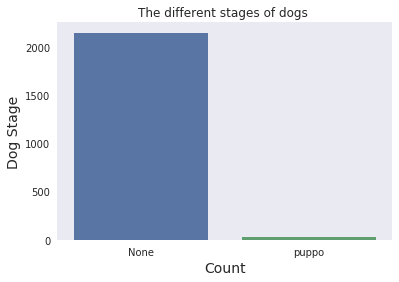

In [126]:
sorted_dog_stage = df_clean['dog_stage'].value_counts().head(3).index
sns.set(style="dark")
sns.countplot(data = df_clean, x = 'dog_stage', order = sorted_dog_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stage', fontsize=14)
plt.title('The different stages of dogs ',fontsize=12)
fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');



In [56]:
#### 4. what are the Rating system Evaluation?

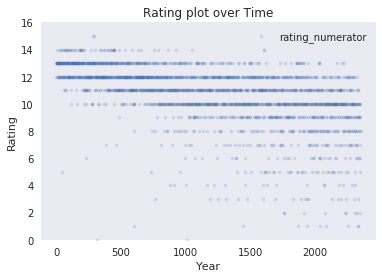

In [127]:
df.plot(y ='rating_numerator', ylim=[0,16],  style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Year')
plt.ylabel('Rating')
fig = plt.gcf()
fig.savefig('output4.png',bbox_inches='tight');

#### Conclusion 
> In this project, we were able to start from scrach to analyze a dataset call WeRateDogs. It was intresting and fun to explore. 
> We also found intresting insight like what are the most rated dogs, the relationships between favorite_count and retweet_count. 

#### Resource

> https://www.geeksforgeeks.org/python-pandas-melt/  
> https://classroom.udacity.com/nanodegrees/  
> https://mode.com/python-tutorial/counting-and-plotting-in-python/
> https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html  
> https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Wrangling_act.ipynb'])